In this file the preprocessing of the dataset is done.

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

In [13]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download("punkt")

lemmatizer = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emiln\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\emiln\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emiln\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emiln\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
#Load the dataset
dataFrame = pd.read_csv('fake reviews dataset.csv', names=['category', 'rating', 'label', 'reviewText'])

#Drop the first row
dataFrame = dataFrame.iloc[1:]
dataFrame.shape

(40432, 4)

In [23]:
print("The dataframe with the loaded data looks like this :)")
dataFrame.head()

The dataframe with the loaded data looks like this :)


,category,rating,label,reviewText
1,Home_and_Kitchen,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
2,Home_and_Kitchen,5.0,CG,"love it, a great upgrade from the original. I..."
3,Home_and_Kitchen,5.0,CG,This pillow saved my back. I love the look and...
4,Home_and_Kitchen,1.0,CG,"Missing information on how to use it, but it i..."
5,Home_and_Kitchen,5.0,CG,Very nice set. Good quality. We have had the s...


Confirm that the loaded dataset does not contain any null values.

In [16]:
print("Number of NaN values in each column")
dataFrame.isnull().sum()

Number of NaN values in each column


category      0
rating        0
label         0
reviewText    0
dtype: int64

Visualize the data in order to be able to understand it better.

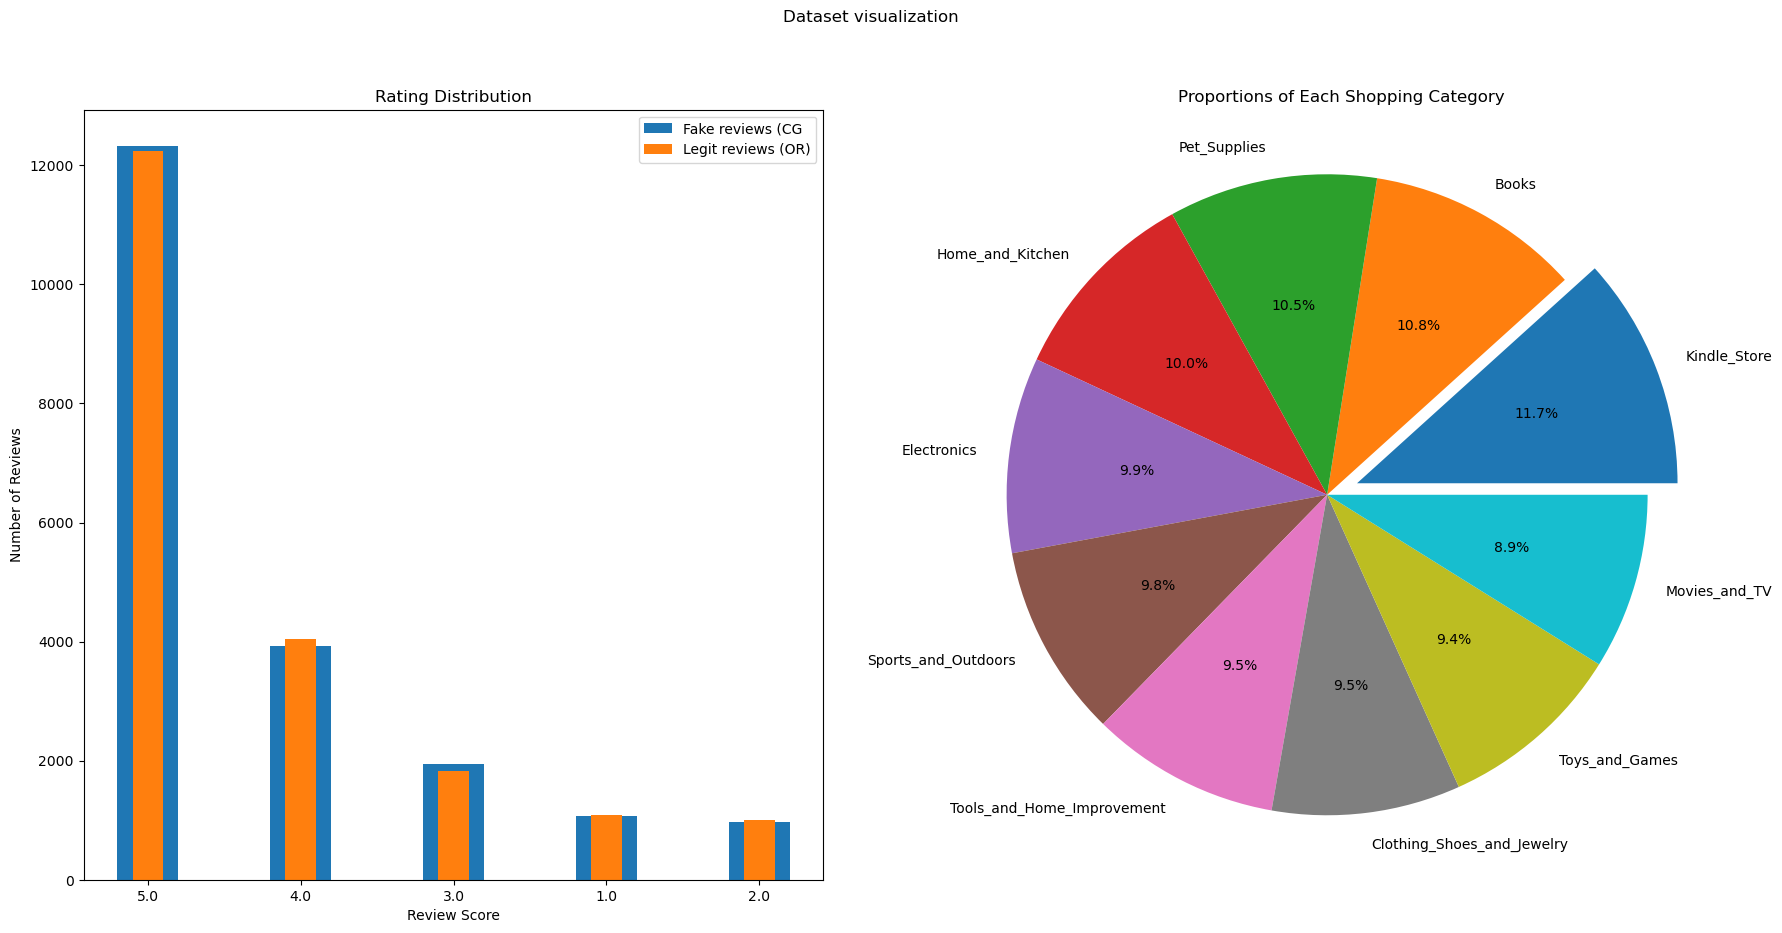

<Figure size 4000x2000 with 0 Axes>

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(21, 10))
plt.figure(figsize=(40,20))
fig.suptitle("Dataset visualization")

labelsRating = dataFrame["rating"].value_counts().keys()
valuesRatingFakeReviews = dataFrame["rating"].loc[dataFrame["label"] == "CG"].value_counts().values
valuesRatingLegitReviews = dataFrame["rating"].loc[dataFrame["label"] == "OR"].value_counts().values
axs[0].set_title("Rating Distribution")
axs[0].set_xlabel("Review Score")
axs[0].set_ylabel("Number of Reviews")
axs[0].bar(labelsRating, valuesRatingFakeReviews, width=0.4, label="Fake reviews (CG")
axs[0].bar(labelsRating, valuesRatingLegitReviews, width=0.2, label="Legit reviews (OR)")
axs[0].legend()

labelsCategory = dataFrame["category"].value_counts().keys()
valuesCategory = dataFrame["category"].value_counts().values
explodeArr = [0.1,0,0,0,0,0,0,0,0,0] 
axs[1].set_title("Proportions of Each Shopping Category")
axs[1].pie(valuesCategory, labels=labelsCategory, explode=explodeArr, autopct='%1.1f%%', shadow=False)
axs[1].axis("equal")

plt.show()

The following observations can be made about the data from the two figures above. The data seems to be evenly split between the number of fake reviews and the number of legit reviews. Furthermore, the number of fake and legit reviews seems to be quite similiar for each rating. Another observation is that the reviews seems to be relativly evenly split between the different categories. 

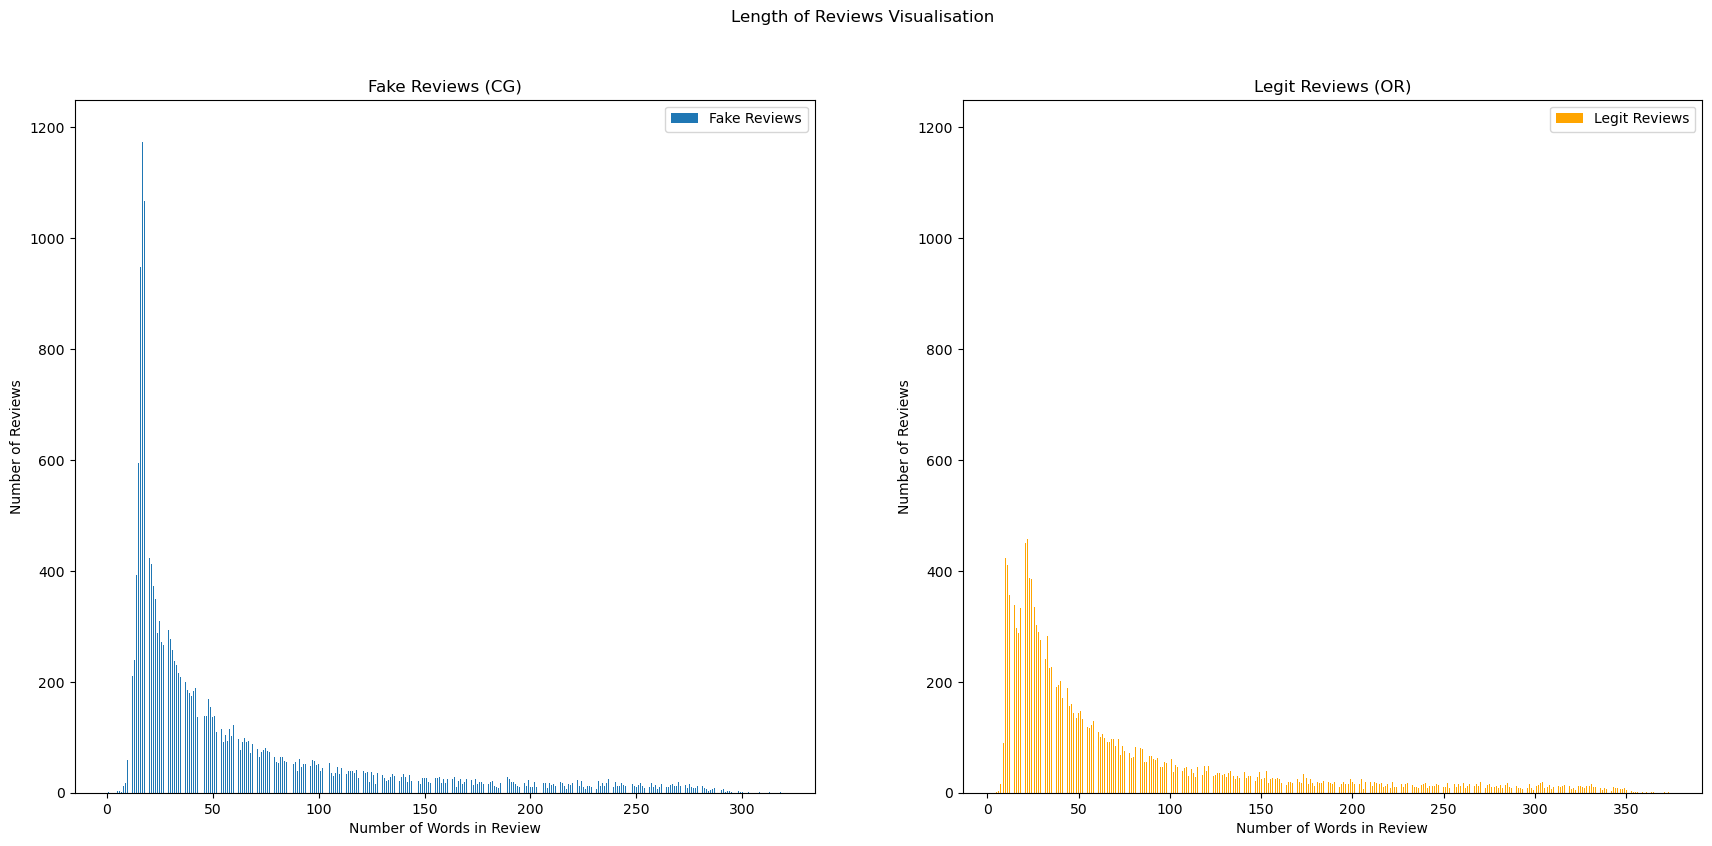

<Figure size 4000x2000 with 0 Axes>

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(21, 9))
plt.figure(figsize=(40,20))
fig.suptitle("Length of Reviews Visualisation")

valuesReviewTxtLenCG = dataFrame["reviewText"].loc[dataFrame["label"] == "CG"].apply(lambda x: len(x.split())).value_counts()
labelsReviewTxtLenCG = valuesReviewTxtLenCG.keys()
axs[0].bar(labelsReviewTxtLenCG,valuesReviewTxtLenCG, width=0.4, label="Fake Reviews")
axs[0].set_ylim(0,1250)
axs[0].set_ylabel("Number of Reviews")
axs[0].set_xlabel("Number of Words in Review")
axs[0].set_title("Fake Reviews (CG)")
axs[0].legend()

valuesReviewTxtLenOR = dataFrame["reviewText"].loc[dataFrame["label"] == "OR"].apply(lambda x: len(x.split())).value_counts()
labelsReviewTxtLenOR = valuesReviewTxtLenOR.keys()
axs[1].bar(labelsReviewTxtLenOR,valuesReviewTxtLenOR,width=0.4, color="orange", label="Legit Reviews")
axs[1].set_ylim(0,1250)
axs[1].set_ylabel("Number of Reviews")
axs[1].set_xlabel("Number of Words in Review")
axs[1].set_title("Legit Reviews (OR)")
axs[1].legend()

plt.show()

The following comments can be made from the figures above. The fake reviews seems to be much shorter than that of the legit reviews. 

In [19]:
#Preprocess the text
def cleanText(text):
    text = text.lower()
    text = ' '.join([word for word in nltk.word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [27]:
print("The review texts looks like this before pre-processing:")
dataFrame["reviewText"].head()

The review texts looks like this before pre-processing:


1    Love this!  Well made, sturdy, and very comfor...
2    love it, a great upgrade from the original.  I...
3    This pillow saved my back. I love the look and...
4    Missing information on how to use it, but it i...
5    Very nice set. Good quality. We have had the s...
Name: reviewText, dtype: object

In [28]:
print("The review texts looks like this after having undergone pre-processing:")
dataFrame["reviewText"].head().apply(cleanText)

The review texts looks like this after having undergone pre-processing:


1       love well made sturdy comfortable love pretty
2    love great upgrade original 've mine couple year
3             pillow saved back love look feel pillow
4         missing information use great product price
5                 nice set good quality set two month
Name: reviewText, dtype: object

Convert the labels to binary representation. Save the preprocessed text as a new column in the data frame. Save the prepreocessed data to a new .csv file. 

In [11]:
dataFrame["type"] = np.where(dataFrame["label"] == "CG", 1, 0)
dataFrame["originText"] = dataFrame["reviewText"]
dataFrame["reviewText"] = dataFrame["reviewText"].apply(cleanText)
dataFrame.to_csv('preprocessed_fake_reviews_dataset.csv')